In [1]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

mpmath.mp.dps = 5

load = np.genfromtxt('./sapphire-gold60nm_80K.txt',skip_header=2)
points80k = np.delete(load,1,1)

load = np.genfromtxt('./sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)

#frequencies = points300k[:,0]
frequencies = [5e3,20e3,50e3,200e3,500e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(110)
domain.add_substrate(sapphire)
domain.add_layer(60e-9,gold)
domain.set_interface_condu(1,4.47e7)
model = FourierModelFDTR(domain,4.05e-6,4.05e-6)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_80 = []
for f in frequencies:
  phases_80.append(model.get_phase(f))

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-9,gold)
domain.set_interface_condu(1,4.47e7)
#domain.set_layer_param(1,kt=33.6,kp=33.6)
model = FourierModelFDTR(domain,4.05e-6,4.05e-6)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_300 = []
for f in frequencies:
  phases_300.append(model.get_phase(f))




{'thickness': 0.001, 'temperature': 110, 'material': <pyFDTR.materials.sapphire object at 0x7f90987a45b0>, 'cp': 647554.4367, 'density': 3970000.0, 'kt': 302.53018800775055, 'kp': 302.53018800775055}
{'temperature': 110, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 44700000.0}
{'thickness': 6e-08, 'temperature': 110, 'material': <pyFDTR.materials.gold object at 0x7f90689389d0>, 'cp': 2138496.8119520196, 'density': 19300000.0, 'kt': 68.100185845, 'kp': 68.100185845}
{'thickness': 0.001, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x7f9068367370>, 'cp': 3074092.9, 'density': 3970000.0, 'kt': 33.15190107105972, 'kp': 33.15190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 44700000.0}
{'thickness': 6e-08, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f9067e8da20>, 'cp': 2494334.686, 'density': 19300000.0, 'kt': 66.0214005, 'kp': 66.0214005}


In [2]:
load = np.genfromtxt('./sapphire-gold60nm_80K.txt',skip_header=2)
points80k = np.delete(load,1,1)

load = np.genfromtxt('./sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)

In [3]:
points300k[:,0]

array([2.4591435e+03, 3.0236934e+03, 3.7178480e+03, 4.5713609e+03,
       5.6208162e+03, 6.9111968e+03, 8.4978124e+03, 1.0448670e+04,
       1.2847390e+04, 1.5796787e+04, 1.9423284e+04, 2.3882321e+04,
       2.9365027e+04, 3.6106408e+04, 4.4395419e+04, 5.4587353e+04,
       6.7119068e+04, 8.2527710e+04, 1.0147374e+05, 1.2476925e+05,
       1.5341274e+05, 1.8863197e+05, 2.3193654e+05, 2.8518262e+05,
       3.5065250e+05, 4.3115241e+05, 5.3013282e+05, 6.5183634e+05,
       8.0147956e+05, 9.8547663e+05, 1.2117142e+06, 1.4898896e+06,
       1.8319261e+06, 2.2524846e+06, 2.7695915e+06, 3.4054115e+06,
       4.1871977e+06, 5.1484601e+06, 6.3304011e+06, 7.7836824e+06,
       9.5705960e+06, 1.1767734e+07, 1.4469274e+07, 1.7791010e+07,
       2.1875324e+07, 2.6897280e+07, 3.3072136e+07, 4.0664565e+07,
       5.0000000e+07])

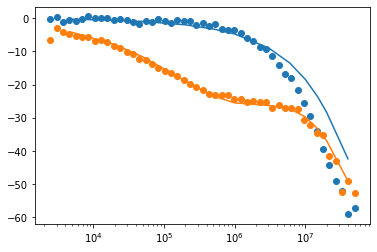

In [4]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_80);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_300);  # Plot some data on the axes.
ax.scatter(points80k[:,0],points80k[:,1])
ax.scatter(points300k[:,0],points300k[:,1])